In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustering import models
from clustering import visualization
from clustering import analysis
import umap
from sklearn.datasets import make_swiss_roll

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

## Visualizing principal components

### Example 1: Simple 2-D dataset

#### First, let's generate a few data points in two dimensions. 

(-5.0, 5.0)

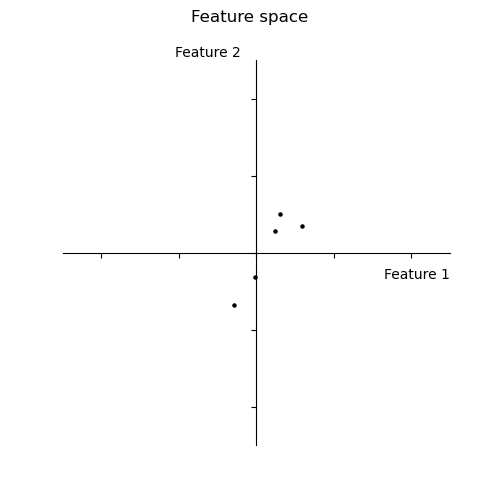

In [3]:
mean = np.array([0,0])
cov = np.array([[1,.6],[.6,1]])
gaussian_data = models.generate_gaussian(mean, cov, 5)
fig, ax = visualization.plot_data(gaussian_data,three_d=False,figsize=(5,5),s=5)
fig.suptitle('Feature space')
ax.set_xlabel('Feature 1',loc='right')
ax.set_ylabel('Feature 2', loc='top',rotation=0)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])


#### Let's generate a few more:

(-5.0, 5.0)

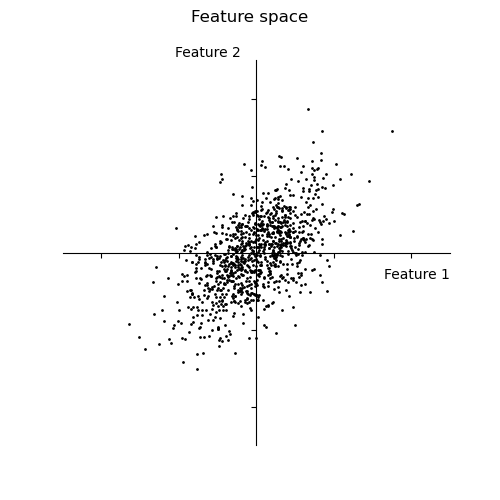

In [7]:
gaussian_data = models.generate_gaussian(mean, cov, 1000)
fig, ax = visualization.plot_data(gaussian_data,three_d=False,figsize=(5,5))
fig.suptitle('Feature space')
ax.set_xlabel('Feature 1',loc='right')
ax.set_ylabel('Feature 2', loc='top',rotation=0)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

#### PCA pulls out the directions in the feature space with the most variance. These are called the <b>principal components</b>, or <b>PCs</b>. 

In [10]:
gaussian_pca = analysis.get_pca_object(gaussian_data)

(-5.0, 5.0)

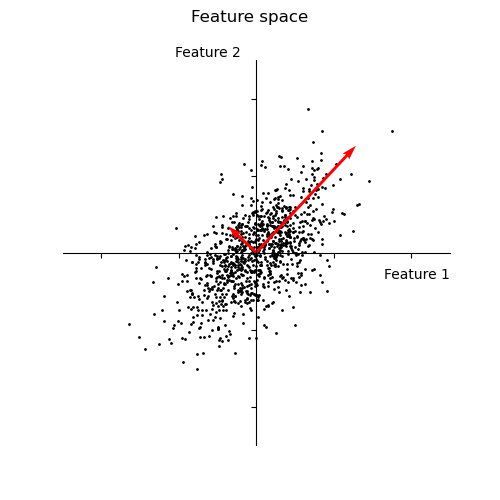

In [12]:
fig, ax = visualization.plot_data(gaussian_data, pca=gaussian_pca, figsize=(5,5))
fig.suptitle('Feature space')
ax.set_xlabel('Feature 1',loc='right')
ax.set_ylabel('Feature 2', loc='top',rotation=0)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

#### Why is this important? PCA gives you a sense of the <b>effective dimensionality</b> of the data.

(-5.0, 5.0)

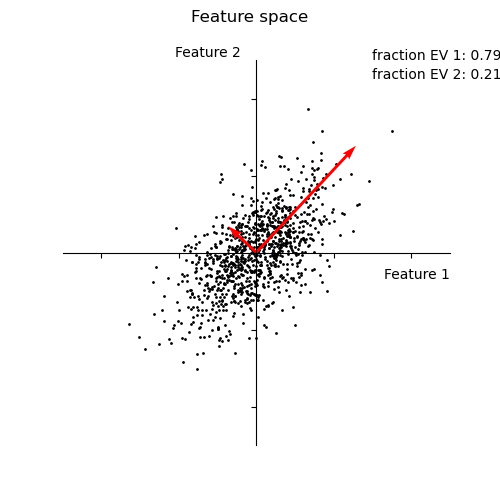

In [13]:
fig, ax = visualization.plot_data(gaussian_data, pca=gaussian_pca, figsize=(5,5))
fig.suptitle('Feature space')
ax.set_xlabel('Feature 1',loc='right')
ax.set_ylabel('Feature 2', loc='top',rotation=0)
ax.text(3,5,s=f'fraction EV 1: {np.round(gaussian_pca.explained_variance_ratio_[0],2)}')
ax.text(3,4.5,s=f'fraction EV 2: {np.round(gaussian_pca.explained_variance_ratio_[1],2)}')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

#### We can 

In [147]:
n_samples = 500
noise = 0.1
swiss_data, swiss_labels = make_swiss_roll(n_samples, noise=noise, random_state=42)
# swiss_data[:,1] *= .1

Text(0.5, 0, 'Feature 3')

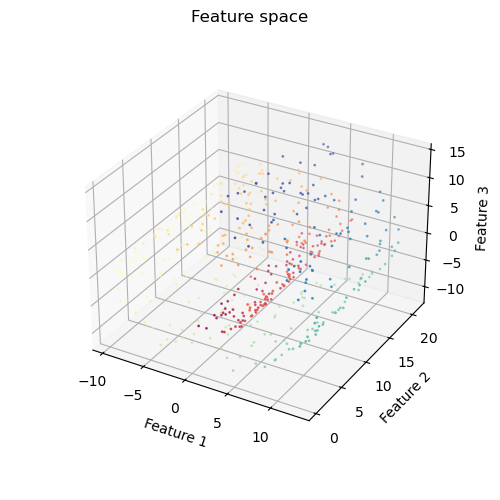

In [148]:
fig, ax = visualization.plot_data(swiss_data, color=swiss_labels, three_d=True, figsize=(5,5))
fig.suptitle('Feature space')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

Text(0.5, 0, 'Feature 3')

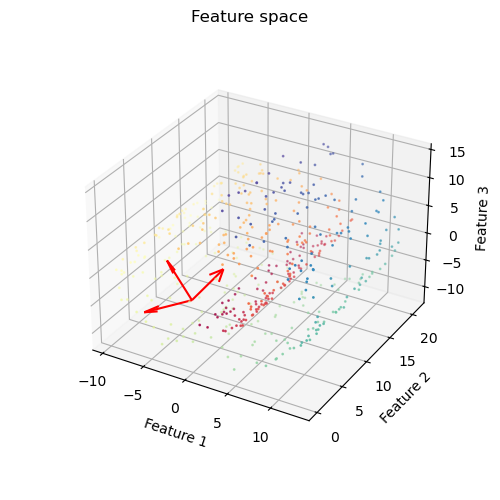

In [149]:
swiss_pca = analysis.get_pca_object(swiss_data)
fig, ax = visualization.plot_data(swiss_data, pca=swiss_pca, color=swiss_labels, pc_scale=20,three_d=True, figsize=(5,5))
fig.suptitle('Feature space')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

Text(0, 1, 'PC 2')

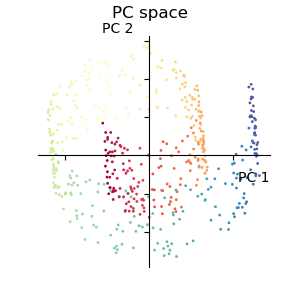

In [150]:
swiss_pca = analysis.get_pca_object(swiss_data,n_components=2)
fig, ax = visualization.plot_data(swiss_pca.transform(swiss_data), color=swiss_labels)
fig.suptitle('PC space')
ax.set_xlabel('PC 1',loc='right')
ax.set_ylabel('PC 2', loc='top',rotation=0)

In [153]:
swiss_UMAP = umap.UMAP(
    n_neighbors=30,
    min_dist=0.3,
    n_components=2,
).fit_transform(swiss_data)

Text(0, 1, 'UMAP 2')

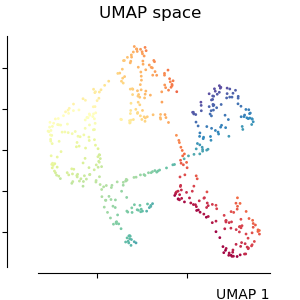

In [154]:
fig, ax = visualization.plot_data(swiss_UMAP, color=swiss_labels)
fig.suptitle('UMAP space')
ax.set_xlabel('UMAP 1',loc='right')
ax.set_ylabel('UMAP 2', loc='top',rotation=0)